# Part One

## Imports

In [ ]:
from google.colab import output
from google.colab import files
from google.colab import drive

drive.mount('/content/gdrive')

import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import statsmodels.api as sm
from scipy import stats
from sklearn import linear_model
from sklearn.linear_model import (
    LinearRegression,
    Ridge,
    Lasso,
    
)
from sklearn.decomposition import  PCA
from sklearn.preprocessing import ( 
    OneHotEncoder,
    StandardScaler,
    MinMaxScaler,
    )
from sklearn import metrics
from sklearn.model_selection import (
    train_test_split,
     GridSearchCV,
     cross_val_score,
     )

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Public Methods

In [ ]:

def UploadFromColab():
  uploaded = files.upload()
  

def DownloadFromColab(data_with_extention):
  files.download(data_with_extention)

def encode_and_bind(original_dataframe, feature_to_encode):
  dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
  res = pd.concat([original_dataframe, dummies], axis=1)
  return(res)

## Exploration Data Analysis (EDA)

In [ ]:
dataset_path='/content/gdrive/My Drive/jobs_train.csv'
original_df = pd.read_csv(dataset_path)

In [ ]:
# Shape of the Original Data set
original_df.shape

(900000, 9)

In [ ]:
#Display the first five records of the Data set
original_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362685006848,COMP14,MANAGER,MASTERS,MATH,FINANCE,24,36,158
1,JOB1362685403468,COMP36,JANITOR,NONE,NONE,FINANCE,3,4,73
2,JOB1362684563560,COMP56,MANAGER,HIGH_SCHOOL,NONE,SERVICE,11,23,103
3,JOB1362684814664,COMP28,JANITOR,NONE,NONE,EDUCATION,22,42,63
4,JOB1362685123815,COMP48,CEO,DOCTORAL,NONE,OIL,15,66,129


In [ ]:
#Display the last five records of the Data set
original_df.tail()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
899995,JOB1362685208051,COMP41,CEO,BACHELORS,COMPSCI,AUTO,21,40,127
899996,JOB1362684496156,COMP54,CTO,BACHELORS,NONE,WEB,20,24,129
899997,JOB1362685401145,COMP40,SENIOR,HIGH_SCHOOL,NONE,AUTO,21,48,127
899998,JOB1362684627870,COMP2,JANITOR,HIGH_SCHOOL,NONE,HEALTH,5,78,46
899999,JOB1362684921313,COMP5,VICE_PRESIDENT,MASTERS,NONE,HEALTH,22,64,119


In [ ]:
#Attributes information
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   jobId                900000 non-null  object
 1   companyId            900000 non-null  object
 2   jobType              900000 non-null  object
 3   degree               900000 non-null  object
 4   major                900000 non-null  object
 5   industry             900000 non-null  object
 6   yearsExperience      900000 non-null  int64 
 7   milesFromMetropolis  900000 non-null  int64 
 8   salary               900000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 61.8+ MB


In [ ]:
#Showing the Unique Values for each attribute
original_df.nunique()

jobId                  900000
companyId                  63
jobType                     8
degree                      5
major                       9
industry                    7
yearsExperience            25
milesFromMetropolis       100
salary                    280
dtype: int64

In [ ]:
#showing statistical descriptions about the data
original_df.describe()

,yearsExperience,milesFromMetropolis,salary
count,900000.000000,900000.000000,900000.000000
mean,11.991183,49.525906,116.067520
std,7.211222,28.883348,38.717799
min,0.000000,0.000000,0.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


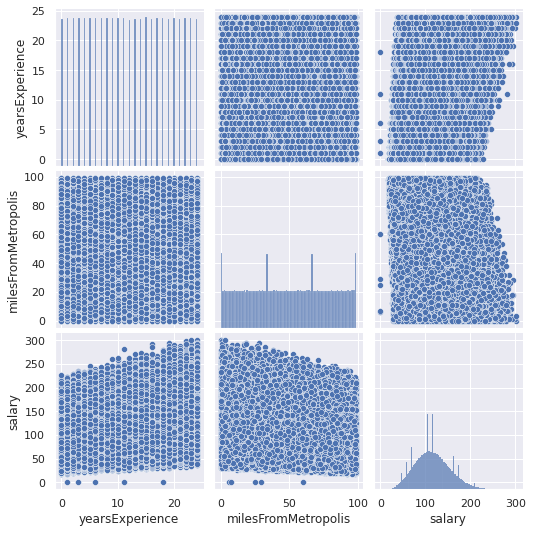

In [ ]:
sns.pairplot(original_df)

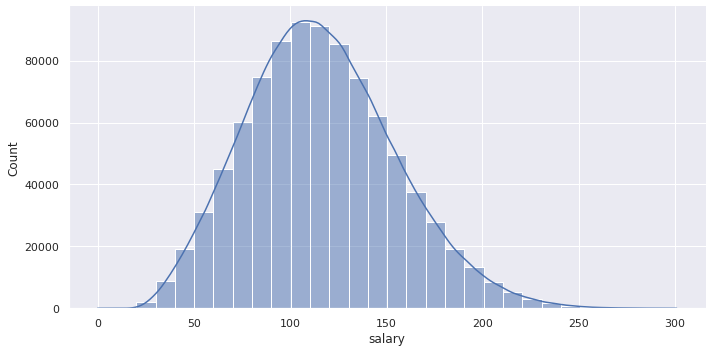

In [ ]:
# Data Distribution according to the salary 
sns.displot(
    original_df,
    x = "salary",
    aspect = 2,
    kind = "hist",
    kde =True,
    bins = 30,
    )

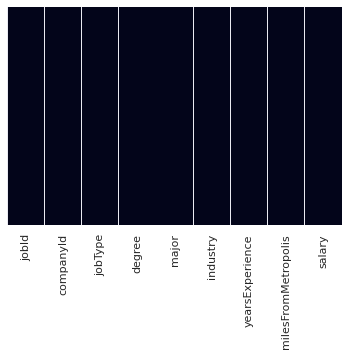

In [ ]:
# Checking if there is any  missing values visually 
sns.heatmap(original_df.isnull(),yticklabels = False, cbar=False)

##Data Preprocessing 

In [ ]:
#check missing values
original_df.isna().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64

,yearsExperience,milesFromMetropolis,salary
count,900000.000000,900000.000000,900000.000000
mean,11.991183,49.525906,116.067520
std,7.211222,28.883348,38.717799
min,0.000000,0.000000,0.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


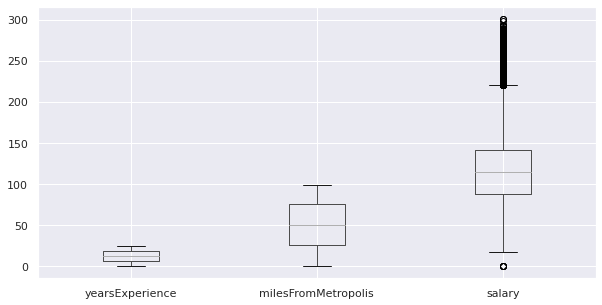

In [ ]:
#checking for outliers
plt.figure(figsize = (10,5))
original_df.boxplot()
original_df.describe()

In [ ]:
#Detecting the Outliers 

''' IQR :
 Inter Quartile Range approach to finding the outliers
 is the most commonly used and most trusted approach used
 in the research field.

'''
Q1 = np.percentile(
    original_df['salary'],
    25, 
    interpolation = 'midpoint'
    ) 
  
Q3 = np.percentile(
    original_df['salary'],
    75,
    interpolation = 'midpoint'
    ) 

IQR = Q3 - Q1 

print("Old Shape: ", original_df.shape) 
# Find the  Upper & Lower bounds

upper = np.where(original_df['salary'] >= (Q3+1.5*IQR))
lower = np.where(original_df['salary'] <= (Q1-1.5*IQR))

#Removing the Outliers
original_df.drop(upper[0], inplace = True)
original_df.drop(lower[0], inplace = True)  
print("New Shape: ", original_df.shape) 


Old Shape:  (900000, 9)
New Shape:  (893594, 9)


,yearsExperience,milesFromMetropolis,salary
count,893594.000000,893594.000000,893594.000000
mean,11.934006,49.731361,115.219897
std,7.197670,28.843497,37.516144
min,0.000000,0.000000,17.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,113.000000
75%,18.000000,75.000000,140.000000
max,24.000000,99.000000,220.000000


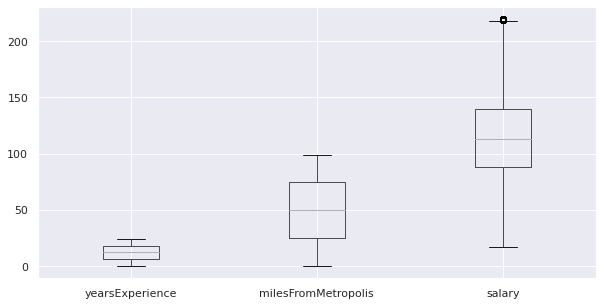

In [ ]:
#checking for outliers
plt.figure(figsize = (10,5))
original_df.boxplot()
original_df.describe()

### Variables  relationships

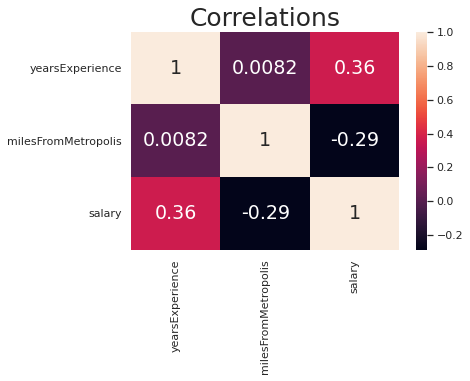

In [ ]:
#check the correlation between the numerical attributes and the salary
correlation = original_df.corr()
sns.heatmap(
    correlation,
    xticklabels = correlation.columns,
    yticklabels = correlation.columns,
    annot = True,
    annot_kws = {'size' : 19 },
    )
plt.title('Correlations',fontsize=25)
plt.show()

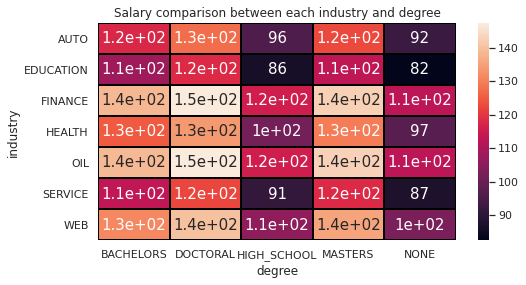

<Figure size 432x288 with 0 Axes>

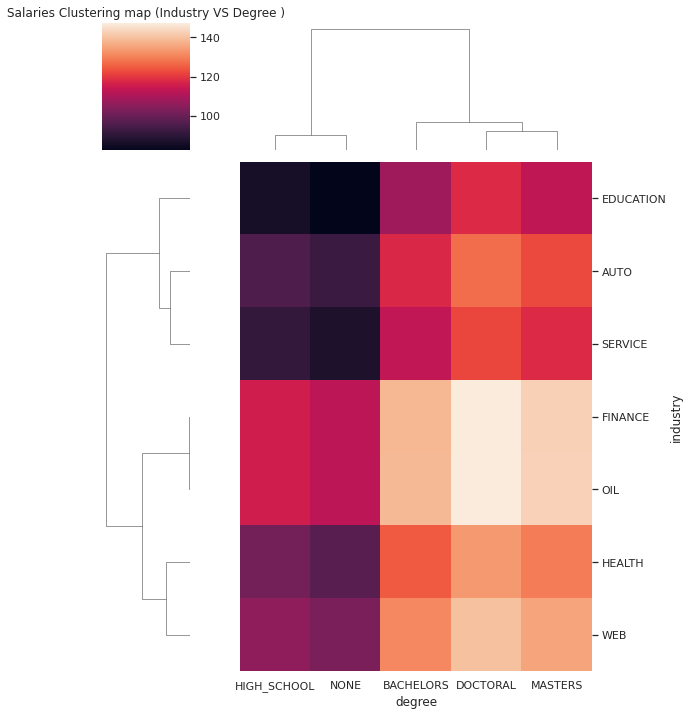

In [ ]:
my_pvt = original_df.pivot_table(
    index = 'industry',
    columns = 'degree',
    values = 'salary',
)
plt.figure(figsize=(8,4))
sns.heatmap(my_pvt,lw=1,linecolor='black',annot=True,annot_kws={'size':15})
plt.title('Salary comparison between each industry and degree')
plt.figure()
sns.clustermap(my_pvt)
plt.title('Salaries Clustering map (Industry VS Degree )')
plt.tight_layout()

<Figure size 1080x360 with 0 Axes>

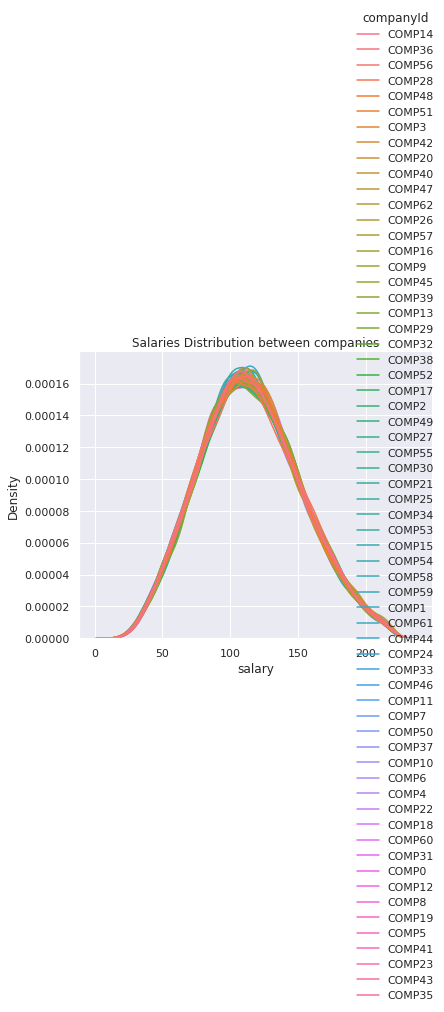

In [ ]:
plt.figure(figsize = (15,5))
sns.displot(original_df, x="salary",hue='companyId', kind="kde",)
plt.title('Salaries Distribution between companies')
plt.tight_layout()

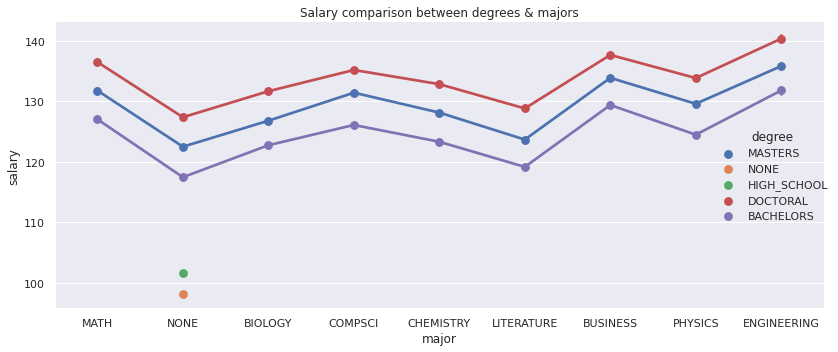

In [ ]:
sns.catplot(y="salary", x="major", hue="degree", kind="point", data=original_df,aspect =2)
plt.title('Salary comparison between degrees & majors')
plt.tight_layout()

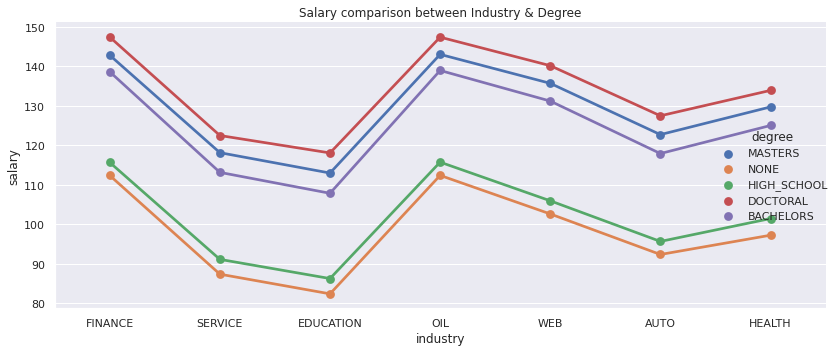

In [ ]:
sns.catplot(y="salary", x="industry", hue="degree", kind="point", data=original_df,aspect =2,legend_out=True)
plt.title('Salary comparison between Industry & Degree')
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

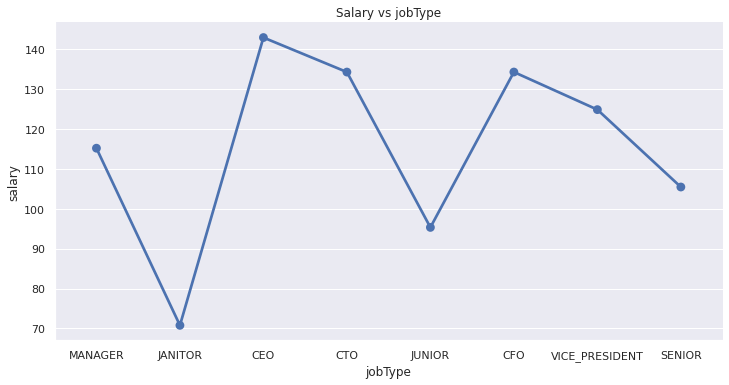

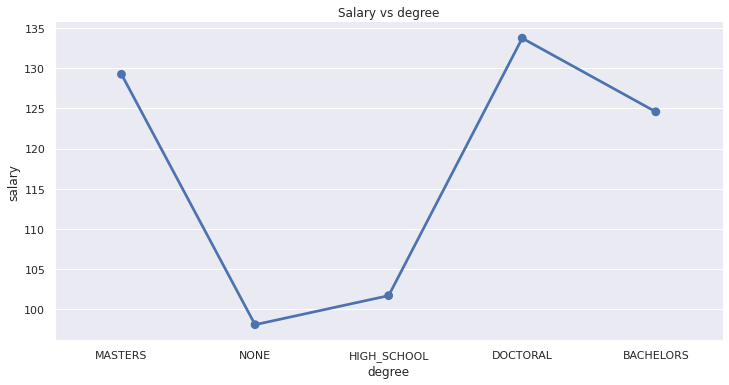

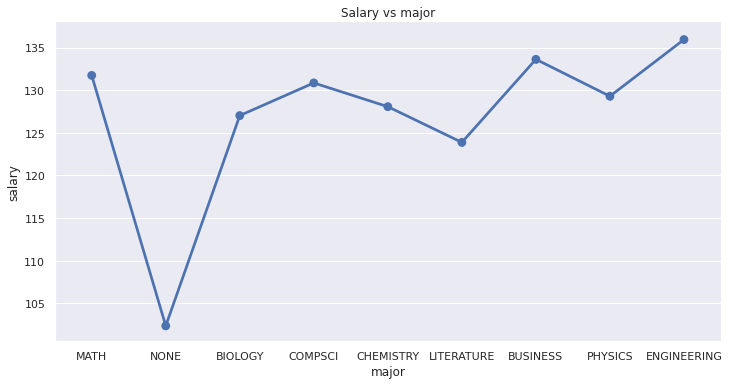

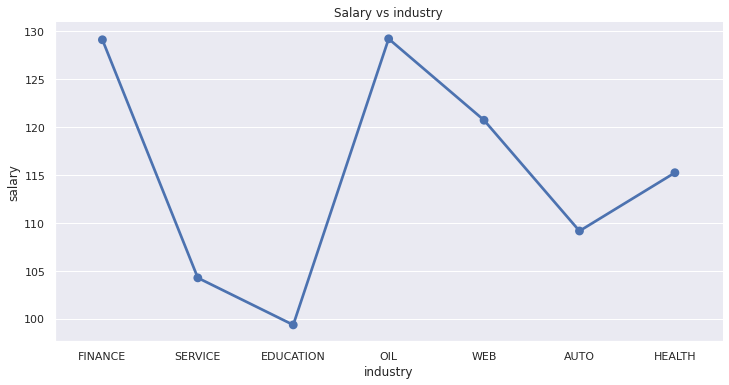

In [ ]:
# Graphical plotting categorical attributes and salary
categorial_attrs = [
                    'jobType',
                    'degree',
                    'major',
                    'industry',
                    ]
for i,col in enumerate(categorial_attrs):
  plt.figure(i)
  sns.catplot(
      data = original_df,
      x = col, 
      y = 'salary',
      kind = 'point',
      aspect = 2
      )
  plt.title(f'Salary vs {col}')

<Figure size 432x288 with 0 Axes>

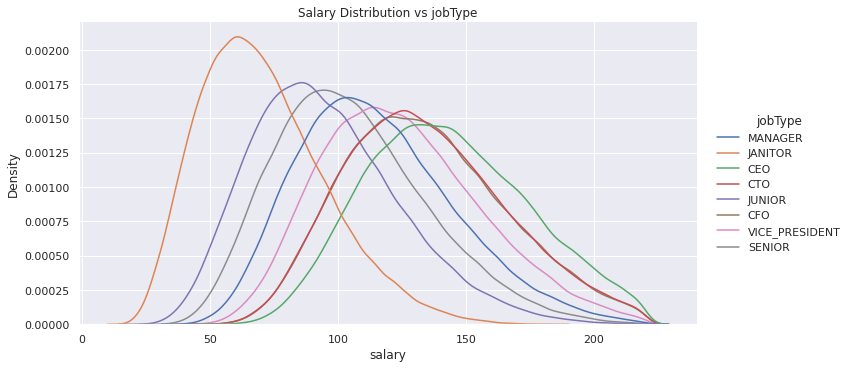

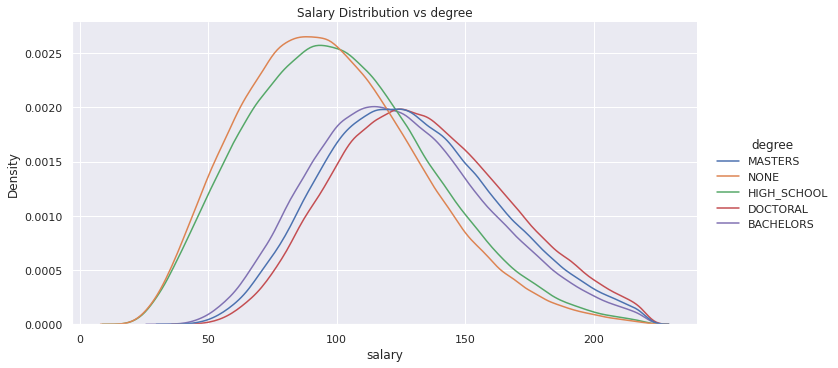

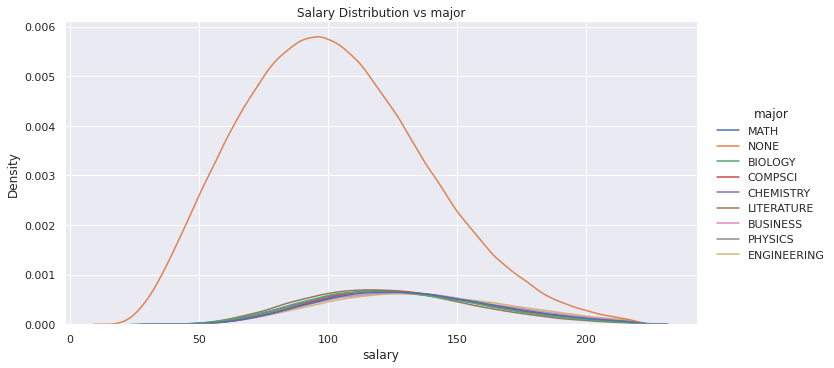

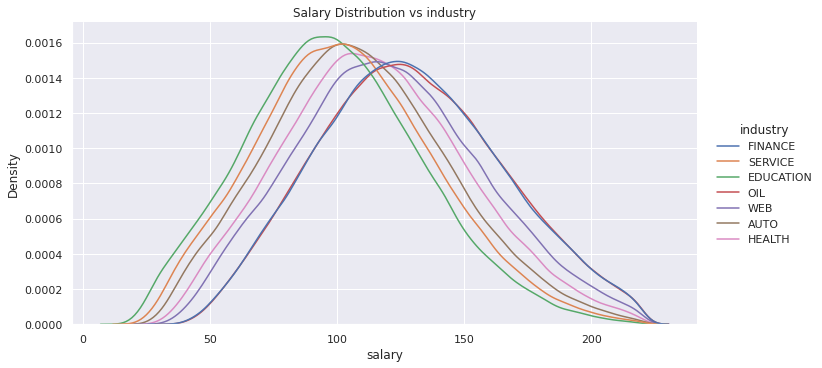

In [ ]:
for i,col in enumerate(categorial_attrs):  
  plt.figure(i)
  sns.displot(
      original_df,
      x = "salary",
      hue = col,
      kind = "kde",
      aspect = 2,
      )
  plt.title(f'Salary Distribution vs {col}')

<Figure size 432x288 with 0 Axes>

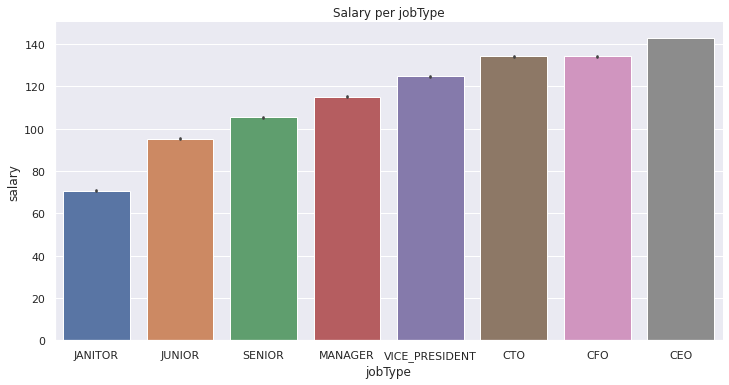

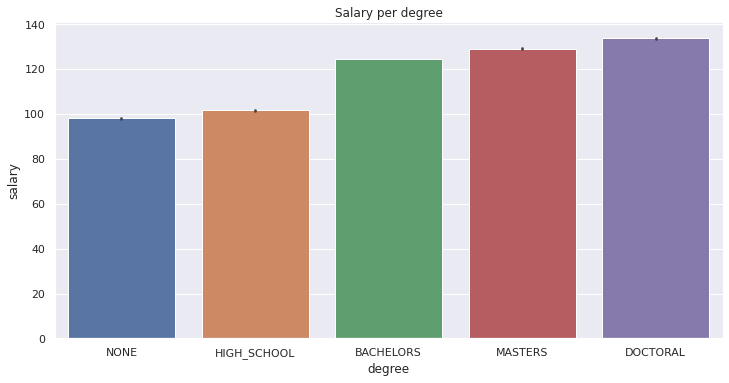

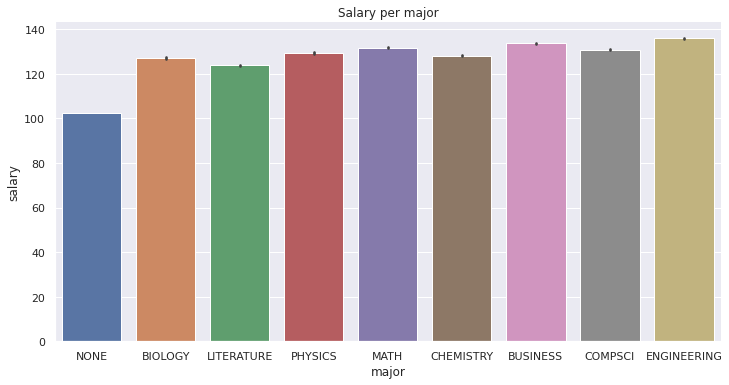

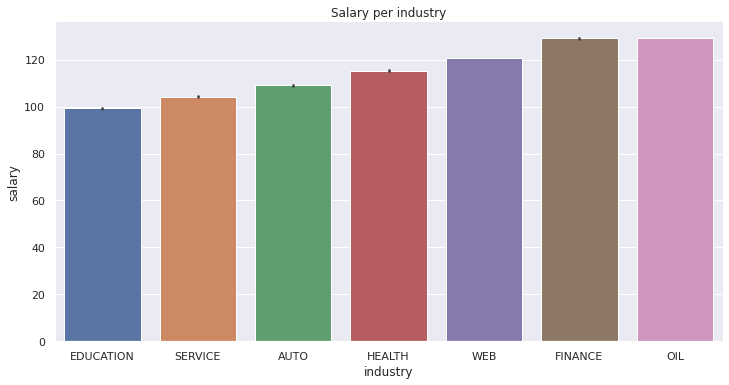

In [ ]:
for i,col in enumerate(categorial_attrs):  
  plt.figure(i)
  sns.catplot(
      x = col, 
      y = "salary", 
      kind = "bar",
      data = original_df.sort_values('salary'),
      aspect = 2
      )
  plt.title(f'Salary per {col}')

### Encoding

In [ ]:
#Ordinal Encoding the degree Feature
categories = {
    
    'NONE' : 0,
    'HIGH_SCHOOL' : 1,
    'BACHELORS' : 2,
    'MASTERS' : 3,
    'DOCTORAL' : 4,

    }
original_df['degree'] = original_df['degree'].map(categories)
original_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362685006848,COMP14,MANAGER,3,MATH,FINANCE,24,36,158
1,JOB1362685403468,COMP36,JANITOR,0,NONE,FINANCE,3,4,73
2,JOB1362684563560,COMP56,MANAGER,1,NONE,SERVICE,11,23,103
3,JOB1362684814664,COMP28,JANITOR,0,NONE,EDUCATION,22,42,63
4,JOB1362685123815,COMP48,CEO,4,NONE,OIL,15,66,129


In [ ]:
#Nominal Encoding (OneHotEncoding) major,industry, jobType Features

one_hot_cols = ['major','industry','jobType']

one_hot_encoder = OneHotEncoder(sparse=False)

original_df = encode_and_bind(original_df,'major')
original_df = encode_and_bind(original_df,'industry')
original_df = encode_and_bind(original_df,'jobType')

In [ ]:
original_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary,major_BIOLOGY,major_BUSINESS,major_CHEMISTRY,major_COMPSCI,major_ENGINEERING,major_LITERATURE,major_MATH,major_NONE,major_PHYSICS,industry_AUTO,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB,jobType_CEO,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,jobType_VICE_PRESIDENT
0,JOB1362685006848,COMP14,MANAGER,3,MATH,FINANCE,24,36,158,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,JOB1362685403468,COMP36,JANITOR,0,NONE,FINANCE,3,4,73,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,JOB1362684563560,COMP56,MANAGER,1,NONE,SERVICE,11,23,103,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,JOB1362684814664,COMP28,JANITOR,0,NONE,EDUCATION,22,42,63,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,JOB1362685123815,COMP48,CEO,4,NONE,OIL,15,66,129,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0


### Removing not needed Columns

In [ ]:
original_df = original_df.drop(
    [
     'jobId',
     'companyId',
     'major',
     'industry',
     'jobType',

      ], 
      axis=1,
      )

print("New Dataframe after applying onehotEncoding\n")
print('Shape : ',original_df.shape)



New Dataframe after applying onehotEncoding

Shape :  (893594, 28)


In [ ]:
original_df.head()

,degree,yearsExperience,milesFromMetropolis,salary,major_BIOLOGY,major_BUSINESS,major_CHEMISTRY,major_COMPSCI,major_ENGINEERING,major_LITERATURE,major_MATH,major_NONE,major_PHYSICS,industry_AUTO,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB,jobType_CEO,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,jobType_VICE_PRESIDENT
0,3,24,36,158,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0,3,4,73,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,1,11,23,103,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,0,22,42,63,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,4,15,66,129,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0


In [ ]:
print(original_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 893594 entries, 0 to 899999
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   degree                  893594 non-null  int64
 1   yearsExperience         893594 non-null  int64
 2   milesFromMetropolis     893594 non-null  int64
 3   salary                  893594 non-null  int64
 4   major_BIOLOGY           893594 non-null  uint8
 5   major_BUSINESS          893594 non-null  uint8
 6   major_CHEMISTRY         893594 non-null  uint8
 7   major_COMPSCI           893594 non-null  uint8
 8   major_ENGINEERING       893594 non-null  uint8
 9   major_LITERATURE        893594 non-null  uint8
 10  major_MATH              893594 non-null  uint8
 11  major_NONE              893594 non-null  uint8
 12  major_PHYSICS           893594 non-null  uint8
 13  industry_AUTO           893594 non-null  uint8
 14  industry_EDUCATION      893594 non-null  uint8
 15  

In [ ]:
original_df.describe()

,degree,yearsExperience,milesFromMetropolis,salary,major_BIOLOGY,major_BUSINESS,major_CHEMISTRY,major_COMPSCI,major_ENGINEERING,major_LITERATURE,major_MATH,major_NONE,major_PHYSICS,industry_AUTO,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB,jobType_CEO,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,jobType_VICE_PRESIDENT
count,893594.000000,893594.000000,893594.000000,893594.000000,893594.000000,893594.000000,893594.000000,893594.000000,893594.000000,893594.000000,893594.000000,893594.000000,893594.000000,893594.000000,893594.000000,893594.000000,893594.000000,893594.000000,893594.000000,893594.000000,893594.000000,893594.000000,893594.000000,893594.000000,893594.000000,893594.000000,893594.000000,893594.000000
mean,1.807092,11.934006,49.731361,115.219897,0.058282,0.057871,0.058801,0.057992,0.057573,0.058854,0.057344,0.535096,0.058187,0.143744,0.143618,0.141730,0.143066,0.141515,0.143443,0.142884,0.122513,0.123819,0.124566,0.125814,0.125537,0.125508,0.126688,0.125555
std,1.422449,7.197670,28.843497,37.516144,0.234275,0.233499,0.235252,0.233728,0.232935,0.235352,0.232498,0.498767,0.234098,0.350830,0.350702,0.348773,0.350140,0.348552,0.350524,0.349954,0.327878,0.329375,0.330226,0.331640,0.331327,0.331294,0.332624,0.331347
min,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,6.000000,25.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,12.000000,50.000000,113.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,18.000000,75.000000,140.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,24.000000,99.000000,220.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Saving the Cleaned Data Frame

In [ ]:
final_df = original_df.copy()
print(f'Shape after Cleaning {final_df.shape}')

Shape after Cleaning (893594, 28)


In [ ]:
# if you want to download it from colab
# pickle.dump( final_df, open( "final_df.csv", "wb" ) )
# DownloadFromColab('final_df.csv')

In [ ]:
# If you want to upload the CSV File
# UploadFromColab()
# final_df = pickle.load( open( "final_df.csv", "rb" ) )

##Modeling

In [ ]:
final_df = pickle.load( open( "/content/gdrive/My Drive/job_posting_dataset/final_df.csv", "rb" ) )
final_df.head()

,degree,yearsExperience,milesFromMetropolis,salary,major_BIOLOGY,major_BUSINESS,major_CHEMISTRY,major_COMPSCI,major_ENGINEERING,major_LITERATURE,major_MATH,major_NONE,major_PHYSICS,industry_AUTO,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB,jobType_CEO,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,jobType_VICE_PRESIDENT
0,3,24,36,158,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0,3,4,73,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,1,11,23,103,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,0,22,42,63,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,4,15,66,129,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0


### Train / Split

In [ ]:
target = final_df['salary']
features = final_df.loc[: , final_df.columns != 'salary']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2)
print('X_train = ',X_train.shape)
print('X_test = ',X_test.shape)
print('y_train = ',y_train.shape)
print('y_test = ',y_test.shape)

X_train =  (714875, 27)
X_test =  (178719, 27)
y_train =  (714875,)
y_test =  (178719,)


###Checking multicorrelanity

In [ ]:
X = features.copy()
Y = target.copy()
X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                 1.053e+05
Date:                Sun, 15 Aug 2021   Prob (F-statistic):               0.00
Time:                        05:51:37   Log-Likelihood:            -3.9073e+06
No. Observations:              893594   AIC:                         7.815e+06
Df Residuals:                  893569   BIC:                         7.815e+06
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     77.2680      0.060   1277.510      0.000      77.149      77.387
degree                     4.6711      0.023    203.701      0.000       4.626       4.716
yearsExperience            1.9536      0.003    693.094      0.000       1.948       1.959
milesFromMetropolis       -0.3864      0.001   -549.412      0.000      -0.388      -0.385
major_BIOLOGY              6.3521      0.080     79.740      0.000       6.196       6.508
major_BUSINESS            13.4682      0.080    168.508      0.000      13.312      13.625
major_CHEMISTRY            7.3702      0.079     92.874      0.000       7.215       7.526
major_COMPSCI             10.3160      0.080    129.214      0.000      10.160      10.473
major_ENGINEERING         16.0836      0.080    200.835      0.000      15.927      16.241
major_LITERATURE           2.9141      0.079     36.727      0.000       2.759       3.070
major_MATH                11.2135      0.080    139.741      0.000      11.056      11.371
major_NONE                 0.9463      0.054     17.614      0.000       0.841       1.052
major_PHYSICS              8.6038      0.080    107.905      0.000       8.448       8.760
industry_AUTO              4.7187      0.050     93.815      0.000       4.620       4.817
industry_EDUCATION        -5.1745      0.050   -102.804      0.000      -5.273      -5.076
industry_FINANCE          25.2228      0.051    498.460      0.000      25.124      25.322
industry_HEALTH           10.8669      0.050    215.610      0.000      10.768      10.966
industry_OIL              25.3191      0.051    499.836      0.000      25.220      25.418
industry_SERVICE          -0.2140      0.050     -4.251      0.000      -0.313      -0.115
industry_WEB              16.5291      0.050    327.768      0.000      16.430      16.628
jobType_CEO               36.4325      0.055    665.248      0.000      36.325      36.540
jobType_CFO               27.3159      0.055    501.027      0.000      27.209      27.423
jobType_CTO               27.3415      0.054    502.717      0.000      27.235      27.448
jobType_JANITOR          -25.0298      0.058   -431.276      0.000     -25.144     -24.916
jobType_JUNIOR           -12.0397      0.054   -222.034      0.000     -12.146     -11.933
jobType_MANAGER            7.7899      0.054    143.700      0.000       7.684       7.896
jobType_SENIOR            -2.0757      0.054    -38.431      0.000      -2.182      -1.970
jobType_VICE_PRESIDENT    17.5333      0.054    323.441      0.000      17.427      17.640
==============================================================================
Omnibus:                     9345.955   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7882.359
Skew:                    

### Model One Normal Linear Regression


intercept
	-83035115655627.11
r^2_training
	0.7388859128745608
r^2_testing
	0.7381160881738054
MAE
	15.594414713181028
MSE
	-368.585335763486
RMSE
	19.198576399397066


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


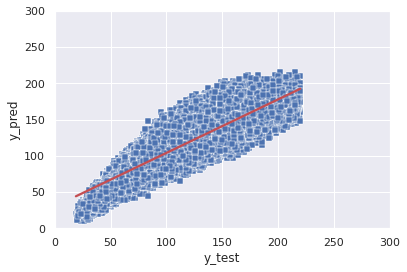

In [ ]:

scaler = MinMaxScaler()
#normalizing data
X_train_normed = scaler.fit_transform(X_train)
X_test_normed = scaler.fit_transform(X_test)

lr_m1 = LinearRegression().fit(X_train_normed, y_train)
lr_m1_r_sq = lr_m1.score(X_train_normed, y_train)
lr_m1_ypredicted = lr_m1.predict(X_test_normed)

cof_model1 = pd.DataFrame(lr_m1.coef_,X_train.columns,columns=['coef'])
my_m1_info = {
    'intercept' : lr_m1.intercept_,
    'r^2_training': lr_m1_r_sq,
    'r^2_testing' : metrics.r2_score(y_test,lr_m1_ypredicted),
    'MAE' : metrics.mean_absolute_error(y_test,lr_m1_ypredicted),
    'MSE' :( -1 * metrics.mean_squared_error(y_test,lr_m1_ypredicted)),
    'RMSE' : np.sqrt(metrics.mean_squared_error(y_test,lr_m1_ypredicted))
}

s1 = pd.Series(y_test)
s2 = pd.Series(lr_m1_ypredicted)
plot_m1_df = pd.DataFrame({'y_test':y_test,'y_pred':lr_m1_ypredicted})

for k,v in my_m1_info.items():
  print(f'{k}\n\t{v}')
g = sns.scatterplot(y_test,lr_m1_ypredicted,marker="s")
g.set_xlabel('Y Test')
g.set_xlim([0,300])
g.set_ylim([0,300])
g.set_ylabel('Y Predict')
sns.regplot('y_test','y_pred',plot_m1_df,line_kws={'color':'r'},scatter=False)

### Model Two Ridge

In [ ]:
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

ridge = Ridge()
params = {
    'alpha' : list(np.arange(0.01,8,0.05)),
    }
ridge_regressor = GridSearchCV(
    ridge,
    params, 
    scoring = 'neg_mean_squared_error',
    cv = 5
    )
ridge_regressor.fit(X_train_std,y_train)
print('Best Alpha ' ,ridge_regressor.best_params_)
print('Best MSE Score ' ,ridge_regressor.best_score_)

Best Alpha  {'alpha': 7.96}
Best MSE Score  -367.5356014254148


In [ ]:
best_ridge_model = ridge_regressor.best_estimator_
print(best_ridge_model)

Ridge(alpha=7.96, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)


#### Testing the Ridge Model

r^2_training 0.7388887513735023
r^2_testing 0.7381072688075219
MSE -368.59774847360677


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


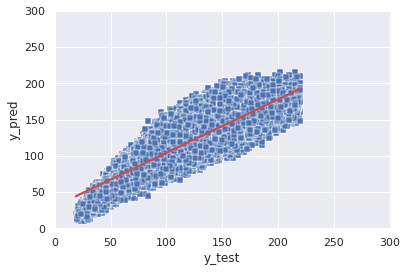

In [ ]:
y_pred_ridge = ridge_regressor.predict(X_test_std)
print('r^2_training' ,best_ridge_model.score(X_train_std,y_train))
print('r^2_testing' , metrics.r2_score(y_test,y_pred_ridge))
print('MSE' , ( -1 * metrics.mean_squared_error(y_test,y_pred_ridge)))


s1 = pd.Series(y_test)
s2 = pd.Series(y_pred_ridge)
plot_m1_df = pd.DataFrame({'y_test':y_test,'y_pred':y_pred_ridge})

g = sns.scatterplot(y_test,y_pred_ridge,marker="s")
g.set_xlabel('Y Test')
g.set_xlim([0,300])
g.set_ylim([0,300])
g.set_ylabel('Y Predict')
sns.regplot('y_test','y_pred',plot_m1_df,line_kws={'color':'r'},scatter=False)

#### Cross Validation and GridSearch Results

In [ ]:
ridge_cross_results_pd = pd.DataFrame(ridge_regressor.cv_results_,columns =ridge_regressor.cv_results_.keys())
ridge_cross_results_pd.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.267729,0.017259,0.013427,0.000174,0.01,{'alpha': 0.01},-368.732867,-366.437852,-366.417712,-368.610038,-367.479539,-367.535602,1.004563,160
1,0.259358,0.008725,0.013939,0.000884,0.06,{'alpha': 0.060000000000000005},-368.732867,-366.437852,-366.417712,-368.610038,-367.479539,-367.535602,1.004563,159
2,0.260579,0.009843,0.013364,0.000224,0.11,{'alpha': 0.11},-368.732867,-366.437852,-366.417713,-368.610038,-367.479539,-367.535602,1.004563,158
3,0.261921,0.006130,0.015454,0.002879,0.16,{'alpha': 0.16000000000000003},-368.732866,-366.437852,-366.417713,-368.610038,-367.479539,-367.535602,1.004562,157
4,0.260044,0.007306,0.013344,0.000136,0.21,{'alpha': 0.21000000000000002},-368.732866,-366.437852,-366.417714,-368.610038,-367.479539,-367.535602,1.004562,156


#### Ridge Model Coeff Results

In [ ]:
ridge_coeff_pd = pd.DataFrame(
    ridge_regressor.best_estimator_.coef_,
    columns = ['coeff'],
    index = X_train.columns
    )
print('Intercept point ' ,ridge_regressor.best_estimator_.intercept_)
ridge_coeff_pd.transpose()

Intercept point  115.23099982514425


,degree,yearsExperience,milesFromMetropolis,major_BIOLOGY,major_BUSINESS,major_CHEMISTRY,major_COMPSCI,major_ENGINEERING,major_LITERATURE,major_MATH,major_NONE,major_PHYSICS,industry_AUTO,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB,jobType_CEO,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,jobType_VICE_PRESIDENT
coeff,6.645504,14.058834,-11.145527,-0.027648,1.655246,0.217813,0.917061,2.252225,-0.805116,1.122889,-2.724589,0.500294,-2.20826,-5.65718,4.974639,-0.05434,4.99476,-3.925576,1.936625,8.833204,5.862501,5.874243,-11.456269,-7.148612,-0.583622,-3.857812,2.632745


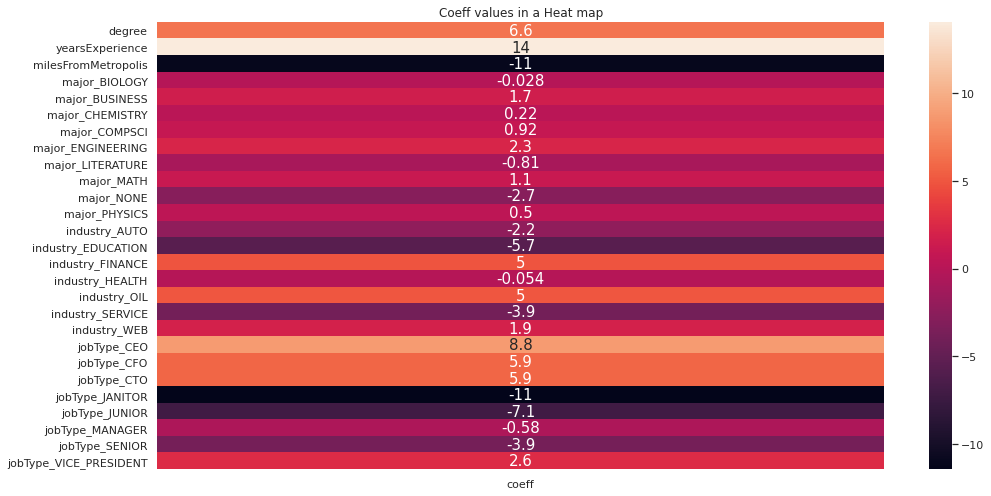

In [ ]:
plt.figure(figsize = (15,7))
sns.heatmap(ridge_coeff_pd,annot=True,annot_kws={'size':15})
plt.title('Coeff values in a Heat map')
plt.tight_layout()

#### Best Ridge Fit Line

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Ridge Y-test , Y-Predict')

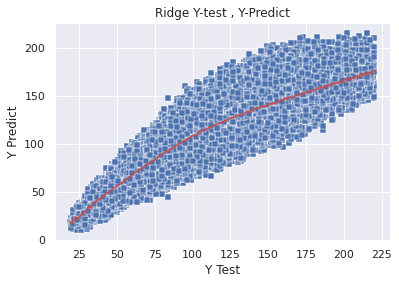

In [ ]:
s1_ridge = pd.Series(list(y_test))
s2_ridge = pd.Series(list(y_pred_ridge))
plot_m1_df = pd.DataFrame({'y_test':s1_ridge,'y_pred':s2_ridge})

g = sns.scatterplot(y_test,y_pred_ridge,marker="s")
g.set_xlabel('Y Test')
g.set_ylabel('Y Predict')
sns.lineplot(data = plot_m1_df , x = 'y_test' , y = 'y_pred', color = 'r')
plt.title('Ridge Y-test , Y-Predict')

####Saving the Ridge Model

In [ ]:
# #save to pickle
# # if you want to download it from colab
# pickle.dump( ridge_regressor, open( "Ridge.p", "wb" ) )
# DownloadFromColab('Ridge.p')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

####Uploading the Ride Model :

In [ ]:

# UploadFromColab()
# ridge_regressor = pickle.load( open( 'Ridge.p', "rb" ) )
# print('MSE' , ( -1 * metrics.mean_squared_error(y_test,y_pred_ridge)))

Saving Ridge.p to Ridge (2).p
MSE -368.59774847360677


###Model Three Lasso

In [ ]:
lasso = Lasso()
param = {
    'alpha' : [1e-15,1e-10,1e-8,1,5,10,15,20],
    }
lasso_regressor = GridSearchCV(
    lasso,
    params,
    scoring = 'neg_mean_squared_error',
    cv = 5,
    )
lasso_regressor.fit(X_train_std,y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.01, 0.060000000000000005, 0.11,
                                   0.16000000000000003, 0.21000000000000002,
                                   0.26, 0.310...
                                   0.36000000000000004, 0.41000000000000003,
                                   0.46, 0.51, 0.56, 0.6100000000000001, 0.66,
                                   0.7100000000000001, 0.76, 0.81,
                                   0.8600000000000001, 0.91, 0.9600000000000001,
                                   1.01, 1.06, 1.11, 1.1600000000000001,
                                   1.21000000000000

#### Testing the Lasso Model

In [ ]:
best_lasso_model = lasso_regressor.best_estimator_
print('Best Alpha ' ,lasso_regressor.best_params_)
print('Best MSE Score ' ,lasso_regressor.best_score_)
lasso_cross_results_pd = pd.DataFrame(
    lasso_regressor.cv_results_,
    columns =lasso_regressor.cv_results_.keys()
    )
lasso_cross_results_pd.head()

Best Alpha  {'alpha': 0.01}
Best MSE Score  -367.5377879042224


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,11.380082,0.135972,0.017654,0.003772,0.01,{'alpha': 0.01},-368.728041,-366.447033,-366.420922,-368.608356,-367.484587,-367.537788,1.000279,1
1,2.426958,0.010200,0.016031,0.003328,0.06,{'alpha': 0.060000000000000005},-368.768224,-366.557502,-366.502436,-368.664024,-367.574213,-367.613280,0.978583,2
2,1.725885,0.032598,0.013365,0.000142,0.11,{'alpha': 0.11},-368.916006,-366.776390,-366.692449,-368.828453,-367.770425,-367.796744,0.956917,3
3,1.559247,0.031385,0.014682,0.002486,0.16,{'alpha': 0.16000000000000003},-369.170844,-367.104906,-366.991577,-369.103017,-368.075062,-368.089081,0.935050,4
4,1.331636,0.014333,0.013257,0.000141,0.21,{'alpha': 0.21000000000000002},-369.499291,-367.519397,-367.381092,-369.450932,-368.459303,-368.462003,0.906733,5


#### Cross Validation and GridSearch Results of Lasso

In [ ]:
lasso_cross_results_pd = pd.DataFrame(
    lasso_regressor.cv_results_,
    columns =lasso_regressor.cv_results_.keys()
    )
lasso_cross_results_pd.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,11.380082,0.135972,0.017654,0.003772,0.01,{'alpha': 0.01},-368.728041,-366.447033,-366.420922,-368.608356,-367.484587,-367.537788,1.000279,1
1,2.426958,0.010200,0.016031,0.003328,0.06,{'alpha': 0.060000000000000005},-368.768224,-366.557502,-366.502436,-368.664024,-367.574213,-367.613280,0.978583,2
2,1.725885,0.032598,0.013365,0.000142,0.11,{'alpha': 0.11},-368.916006,-366.776390,-366.692449,-368.828453,-367.770425,-367.796744,0.956917,3
3,1.559247,0.031385,0.014682,0.002486,0.16,{'alpha': 0.16000000000000003},-369.170844,-367.104906,-366.991577,-369.103017,-368.075062,-368.089081,0.935050,4
4,1.331636,0.014333,0.013257,0.000141,0.21,{'alpha': 0.21000000000000002},-369.499291,-367.519397,-367.381092,-369.450932,-368.459303,-368.462003,0.906733,5


r^2_training 0.7388872153818451
r^2_testing 0.7381060308609483
MSE -368.5994908064989


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Lasso Best Fit Line')

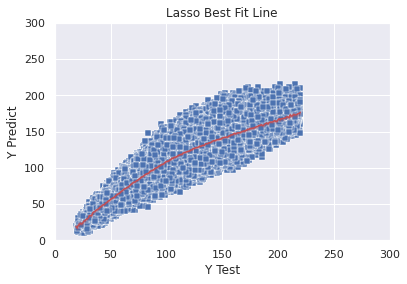

In [ ]:
y_pred_lasso = lasso_regressor.predict(X_test_std)
print('r^2_training' ,best_lasso_model.score(X_train_std,y_train))
print('r^2_testing' , metrics.r2_score(y_test,y_pred_lasso))
print('MSE' , ( -1 * metrics.mean_squared_error(y_test,y_pred_lasso)))

s1_lasso = pd.Series(list(y_test))
s2_lasso = pd.Series(list(y_pred_lasso))

plot_m3_df = pd.DataFrame({'y_test':s1_lasso,'y_pred':s2_lasso})

g = sns.scatterplot(y_test,y_pred_lasso,marker="s")
g.set_xlabel('Y Test')
g.set_xlim([0,300])
g.set_ylim([0,300])
g.set_ylabel('Y Predict')
sns.lineplot(x = 'y_test',y= 'y_pred',data = plot_m3_df,color = 'r')
plt.title('Lasso Best Fit Line')

####Lasso Coeff

In [ ]:
lasso_coeff_pd = pd.DataFrame(
    lasso_regressor.best_estimator_.coef_,
    columns = ['coeff'],
    index = X_train.columns
    )
print('Intercept point ' ,lasso_regressor.best_estimator_.intercept_)
lasso_coeff_pd.transpose()

Intercept point  115.23099982514425


,degree,yearsExperience,milesFromMetropolis,major_BIOLOGY,major_BUSINESS,major_CHEMISTRY,major_COMPSCI,major_ENGINEERING,major_LITERATURE,major_MATH,major_NONE,major_PHYSICS,industry_AUTO,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB,jobType_CEO,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,jobType_VICE_PRESIDENT
coeff,6.641161,14.048531,-11.135157,-0.243228,1.421457,-0.0,0.683333,2.01899,-1.021564,0.890181,-3.204304,0.266531,-2.146618,-5.595414,5.018833,-0.0,5.038955,-3.863655,1.981292,9.393539,6.42535,6.438667,-10.875415,-6.565199,-0.0,-3.271803,3.199122


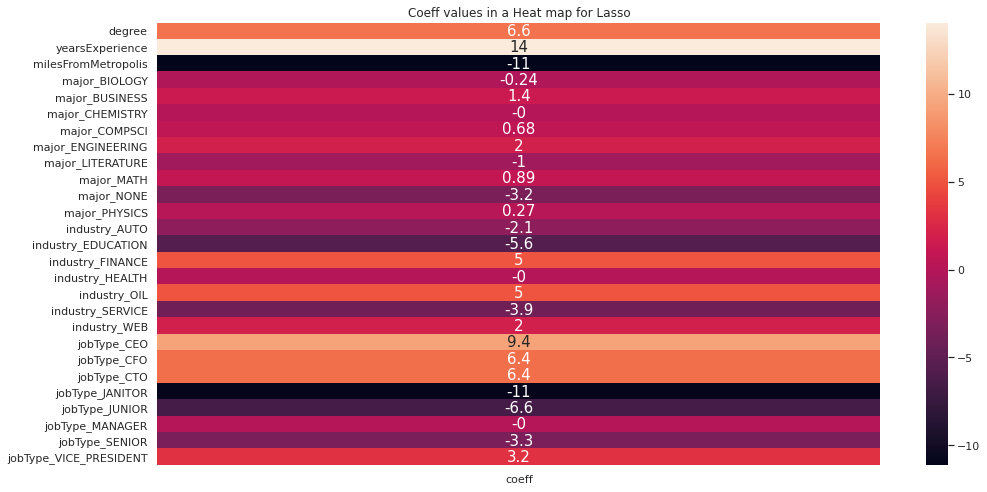

In [ ]:
plt.figure(figsize = (15,7))
sns.heatmap(lasso_coeff_pd,annot=True,annot_kws={'size':15})
plt.title('Coeff values in a Heat map for Lasso')
plt.tight_layout()

#### Saving The Lasso Model

In [ ]:
# # #save to pickle
# # # if you want to download it from colab
# pickle.dump( lasso_regressor, open( "Lasso.p", "wb" ) )
# DownloadFromColab('Lasso.p')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Uploading the Lasso model

In [ ]:

# UploadFromColab()
# lasso_regressor = pickle.load( open( 'Lasso.p', "rb" ) )
# print('MSE' , ( -1 * metrics.mean_squared_error(y_test,y_pred_lasso)))

Saving Ridge.p to Ridge (2).p
MSE -368.59774847360677


# Part Two

In [ ]:
def get_predictions(csv_path,regressor,is_pickle = True): #where regressor is the trained model
  #reading the Data Set
  if is_pickle:
    my_data = pickle.load( open( csv_path, "rb" ) )
  else:
    my_data = pd.read_csv(csv_path)
  
  #split it into train and test 
  target = final_df['salary']
  features = final_df.loc[: , final_df.columns != 'salary']
  X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2)
  scaler = StandardScaler()
  scaler.fit(X_train)
  scaler.fit(X_test)
  X_train_std = scaler.transform(X_train)
  X_test_std = scaler.transform(X_test)

  y_pred = regressor.predict(X_test_std)

  predictions = {
      'r^2_training' : regressor.best_estimator_.score(X_train_std,y_train),
      'r^2_testing' : metrics.r2_score(y_test,y_pred),
      'MSE' : ( -1 * metrics.mean_squared_error(y_test,y_pred))
  }
  return predictions

## Testing

In [ ]:
print('Using Lasso Regressor :')
predictions =  get_predictions("/content/gdrive/My Drive/job_posting_dataset/final_df.csv",lasso_regressor)
lasso_preditioncs_df = pd.DataFrame(
    predictions,
    index = {'Value'}
)
lasso_preditioncs_df.head()


Using Lasso Regressor :


,r^2_training,r^2_testing,MSE
Value,0.73866,0.738999,-368.901846


In [ ]:
#Note if the CSV File is not pickled you need to pass is_pickle = False
print('Using Lasso Regressor :')
predictions =  get_predictions("/content/gdrive/My Drive/jobs_train.csv",lasso_regressor,is_pickle=False)
lasso_preditioncs_df = pd.DataFrame(
    predictions,
    index = {'Value'}
)
lasso_preditioncs_df.head()


Using Lasso Regressor :


,r^2_training,r^2_testing,MSE
Value,0.738934,0.737912,-368.456125
